### Clasificador_Árbol_De_Decisión_Medicamentos_Pacientes_Mismas_Enfermedades

El código proporcionado importa varias bibliotecas esenciales en el ámbito del análisis de datos y el modelado de aprendizaje automático en Python.

In [2]:
import pandas as pd #Esta línea importa la biblioteca pandas y la renombra como pd, lo que nos permite utilizar las funciones y objetos de pandas en nuestro código.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('drug200.csv')#Leer los datos de Medicamentos200.
data

#     0    1      2      3        4       5

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


El siguiente código selecciona columnas específicas de un DataFrame utilizando la función iloc en el módulo pandas. La variable *a* almacena las columnas 1, 2, 3 y 5 del DataFrame, mientras que la variable *b* almacena las columnas 0 y 4.

In [40]:
#Variables Categóricas
#.iloc[Filas:,colum1,colum2, column3]

a = data.iloc[:, [1,2,3,5]]
a

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [41]:
#variables Númericas
#.iloc[Filas:,colum1,colum2, column3]
b = data.iloc[:,[0, 4]]
b

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


#### PRE-PROCESAMIENTO

El siguiente código realiza la codificación de variables categóricas en un conjunto de datos. Aquí está la explicación paso a paso del código:

In [6]:
#Convertirlos en valores numéricos.
#Esto se puede hacer utilizando el codificador de etiquetas (Label Encoder).
#Separamos el conjunto de datos en conjuntos de datos numéricos y no numéricos:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('drug200.csv') # Leer los datos de Medicamentos200

# Convertir las columnas en valores numéricos (variables categóricas)
label_encoder = LabelEncoder()
numerical_data = a.copy()
non_numerical_data = b.copy()

for column in numerical_data.columns:
    if numerical_data[column].dtype == 'object':
        numerical_data[column] = label_encoder.fit_transform(numerical_data[column])

numerical_data

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
...,...,...,...,...
195,0,1,0,2
196,1,1,0,2
197,1,2,0,3
198,1,2,1,3


* Se crea una instancia del objeto LabelEncoder(), el cual se utilizará para realizar la codificación de las variables categóricas.

* Se crea una copia del DataFrame a y se asigna a la variable numerical_data. Esta copia se utilizará para almacenar los datos numéricos codificados.

* Se crea una copia del DataFrame b y se asigna a la variable non_numerical_data. Esta copia se utilizará para almacenar los datos no numéricos originales.

* El bucle for itera sobre todas las columnas del DataFrame numerical_data.

* Dentro del bucle, se verifica si el tipo de datos de la columna actual es 'object', lo cual indica que es una variable categórica.

En resumen, el código utiliza el objeto LabelEncoder para codificar las variables categóricas en un DataFrame. Los valores numéricos codificados reemplazan a los valores categóricos originales en el DataFrame resultante numerical_data.

In [8]:
a_enc = a.copy()
for col in a.columns:
    lb = LabelEncoder()
    a_enc[col] = lb.fit_transform(a[col].values)
a_enc

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
...,...,...,...,...
195,0,1,0,2
196,1,1,0,2
197,1,2,0,3
198,1,2,1,3


In [9]:
data1 = pd.concat([b, a_enc], axis = 1)

## Evaluando los datos

### Comprobando el recuento, mínimo, máximo y promedio para los datos.

In [10]:
data1.describe()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


###  Comprobando valores nulos

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int32  
 3   BP           200 non-null    int32  
 4   Cholesterol  200 non-null    int32  
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [12]:
data1.duplicated().sum()

0

### Visualizando las clases objetivo

In [13]:
data1['Drug'].unique()

array([4, 2, 3, 0, 1])

<Axes: xlabel='Drug', ylabel='count'>

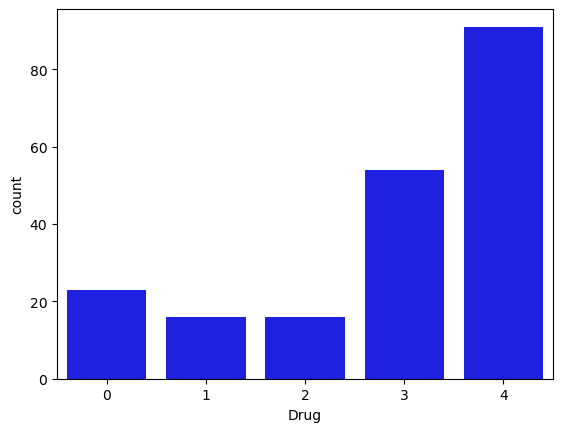

In [14]:
sns.countplot(x = data1['Drug'], color= 'blue')

## Dividiendo en características y objetivo

* Las características son las variables independientes y sus valores determinan la clase de la característica.

* El objetivo es la variable dependiente y se espera que predigamos correctamente la clase objetivo.

In [42]:
X = data1.drop('Drug', axis = 1)
y = data1['Drug']

## Function for Model Evaluation

Esta función muestra una representación visual de la matriz de confusión utilizando un mapa de calor, donde se resalta la cantidad de predicciones correctas e incorrectas para cada clase.

In [43]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(5,5)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

## Construcción de modelos para Árboles de Decisión

clf = Clasificador de Árbol de Decisión

In [44]:
clf = DecisionTreeClassifier()

## Utilizando validación cruzada para encontrar los parámetros de mayor precisión.

Estos parámetros y sus respectivos valores se utilizan para buscar la combinación óptima que brinde el mejor rendimiento al entrenar un modelo de Árbol de Decisión.

In [30]:
param_dist = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

El código realiza una búsqueda aleatoria de hiperparámetros para encontrar la mejor combinación de parámetros para el modelo de Árbol de Decisión. Luego, ajusta el modelo utilizando los datos proporcionados y los parámetros óptimos encontrados.

In [45]:
rcv = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
rcv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

El atributo best_score_ en el contexto de aprendizaje automático se refiere al mejor puntaje obtenido durante el proceso de validación cruzada.

In [20]:
rcv.best_score_

0.985

El atributo best_estimator_ en el contexto de aprendizaje automático se refiere al mejor estimador o modelo obtenido durante el proceso de validación cruzada. La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático en un conjunto de datos, y consiste en dividir el conjunto de datos en partes más pequeñas llamadas "folds" o pliegues.

In [32]:
rcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

El atributo best_params_ en el contexto de aprendizaje automático se refiere a los mejores parámetros encontrados durante el proceso de búsqueda de hiperparámetros utilizando validación cruzada.

In [33]:
rcv.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'entropy'}

La línea de código X_train, X_test, y_train, y_test = train_test_split(X, y) se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Construyendo el modelo de Árbol de Decisión que mejor se ajuste

El código dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=15, min_samples_split=12).fit(X_train, y_train) se utiliza para crear y entrenar un modelo de clasificación basado en un árbol de decisión utilizando el clasificador DecisionTreeClassifier de scikit-learn.

In [35]:
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12).fit(X_train, y_train)

dt.score(X_train, y_train) y dt.score(X_test, y_test) son llamadas al método score() aplicadas al modelo de clasificación dt para calcular la precisión del modelo en los conjuntos de entrenamiento y prueba, respectivamente.

In [36]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 1.0)

Como podemos observar, hemos logrado una precisión del 100% tanto para los conjuntos de entrenamiento como de prueba. Nuestro modelo es perfecto o casi perfecto.

## Evaluación de nuestro modelo
* La figura a continuación mostrará cómo nuestro modelo ha predicho los valores y también mostrará las cantidades.

* Los bloques en la diagonal son los valores predichos correctamente y los bloques fuera de la diagonal son los valores predichos incorrectamente.

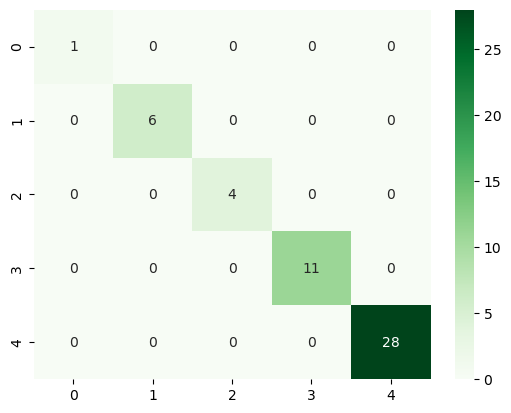

In [37]:
model_evaluation(dt)

La línea de código model_evaluation(dt) parece estar llamando a una función personalizada llamada model_evaluation() y pasando el modelo dt como argumento. Sin más información sobre la implementación específica de esa función, puedo proporcionar una explicación general de lo que se podría esperar que haga.